# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load the Data](#2.4_Load_the_Data)
  * [2.5 Explore the Data](#2.5_Explore_the_Data)
  * [2.6 Look at missing values](#2.6_Look_at_missing_values)
      * [2.6.1 Columns with the most missing values](#2.6.1_Columns_with_the_most_missing_values)
  * [2.7 Data types](#2.7_Data_types)
  * [2.8 Initial column drops](#2.8_Initial_column_drops)
  * [2.9 Initial data cleaning](#2.9_Initial_data_cleaning)
  * [2.10 Data descriptions](#2.10_Data_descriptions)
  * [2.11 Missing Data Second Look](#2.11_Missing_Data_Second_Look)
      * [2.11.1 Filling Missing Data](#2.11.1_Filling_Missing_Data)
  * [2.12 Look at object columns](#2.12_Look_at_object_columns)
  * [2.13 Bar plots of the features](#2.13_Bar_plots_of_the_features)
  * [2.14 Outlier Removal](#2.14_Outlier_Removal)
  * [2.15 Save the data](#2.15_Save_the_data)
  * [2.16 Summary](#2.16_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>
From Kaggle - Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers and origination fee and investors a service fee.

In this notebook I will focus on collecting the data, organizing it, and making sure it's well defined. This is a large data set with 74 columns and over 800,000 rows. While cleaning the data, I will end up deleting some columns and rows but, overall, I would like to keep most of the columns until I decide which features will be useful for my model. 


## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.4 Load the Data<a id='2.4_Load_the_Data'></a>

For information about each column - https://www.rdocumentation.org/packages/creditmodel/versions/1.0/topics/lendingclub

In [2]:
# read in csv data - training set
lending_data = pd.read_csv('../raw_data/lc_loan.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read in csv data - test set
lending_data_test = pd.read_csv('../raw_data/lc_2016_2017.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 2.5 Explore the Data<a id='2.5_Explore_the_Data'></a>

In [4]:
# what does the Lending Club data look like?
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [5]:
# what does the hold-out test set look like?
lending_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

It looks like there are two less columns in the test set than the training set. This will require a closer look. First, I want to look at which column could make a good index. 

In [6]:
# id: A unique LC assigned ID for the loan listing.
# member_id: A unique LC assigned Id for the borrower member.
# based on the column descriptions, it looks like 'id' or 'member_id' would be a good choice for the index
lending_data[['id', 'member_id']].nunique()

id           887379
member_id    887379
dtype: int64

In [7]:
lending_data_test[['id', 'member_id']].nunique()

id           759338
member_id         0
dtype: int64

The 'member_id' column in the test data is missing values. Therefore, it looks like the 'id' column would be the best choice for the index.

Next, I will take a closer look which columns are in the training data but not in test.

In [8]:
#taken from datascience.stackexchange.com to look at which columns are the same between the two dataframes
list(set(lending_data.columns).intersection(set(lending_data_test.columns)))

['funded_amnt',
 'total_bal_il',
 'next_pymnt_d',
 'total_rev_hi_lim',
 'open_il_12m',
 'id',
 'verification_status_joint',
 'zip_code',
 'total_acc',
 'term',
 'last_pymnt_d',
 'acc_now_delinq',
 'installment',
 'verification_status',
 'il_util',
 'open_rv_24m',
 'sub_grade',
 'annual_inc',
 'out_prncp_inv',
 'max_bal_bc',
 'open_acc_6m',
 'desc',
 'addr_state',
 'funded_amnt_inv',
 'last_pymnt_amnt',
 'all_util',
 'tot_cur_bal',
 'total_cu_tl',
 'dti_joint',
 'total_rec_late_fee',
 'mths_since_rcnt_il',
 'application_type',
 'pymnt_plan',
 'mths_since_last_record',
 'pub_rec',
 'open_rv_12m',
 'collections_12_mths_ex_med',
 'open_acc',
 'annual_inc_joint',
 'member_id',
 'inq_last_6mths',
 'out_prncp',
 'loan_status',
 'total_pymnt',
 'policy_code',
 'tot_coll_amt',
 'mths_since_last_major_derog',
 'total_rec_int',
 'last_credit_pull_d',
 'delinq_2yrs',
 'earliest_cr_line',
 'total_rec_prncp',
 'recoveries',
 'revol_util',
 'emp_length',
 'mths_since_last_delinq',
 'emp_title',
 'inq

In [9]:
# Looking at which columns are in lending_data but not lending_data_test
list(set(lending_data.columns).difference(set(lending_data_test.columns)))

['open_il_6m', 'url']

In [10]:
# Looking at which columns are in lending_data_test but not lending_data
list(set(lending_data_test.columns).difference(set(lending_data.columns)))

[]

It looks like all of the columns in the test set are in the training set but 'url' and 'open_il_6m' are in the training set and not in test. It would make sense to drop these two columns.

Now, what is in the column 'loan_status'?

In [11]:
lending_data.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Some of these values for loan_status are confusing. The loans with 'loan_status' of 'Late' or 'In Grace Period' are not in good standing but they have not yet defaulted. I am going to drop those samples along with the 'Issued' and 'Current' inorder to make the two sets clear for machine learning. 

In [12]:
print(lending_data.shape)
lending_data = lending_data[~lending_data.loan_status.str.contains('Late')]
lending_data = lending_data[~lending_data.loan_status.str.contains('In Grace')]
lending_data = lending_data[~lending_data.loan_status.str.contains('Current')]
lending_data = lending_data[~lending_data.loan_status.str.contains('Issued')]
print(lending_data.shape)

(887379, 74)
(256939, 74)


## 2.6 Look at missing values<a id='2.6_Look_at_missing_values'></a>

In [13]:
# Looking at missing values by columns
# copied from the guided capstone
missing_train = pd.concat([lending_data.isnull().sum(), 100 * lending_data.isnull().mean()], axis=1)
missing_train.columns=['count', '%']
missing_train.sort_values(by='%', ascending=False).head(40)

,count,%
annual_inc_joint,256938,99.999611
verification_status_joint,256938,99.999611
dti_joint,256938,99.999611
il_util,256813,99.950961
mths_since_rcnt_il,256799,99.945512
open_acc_6m,256795,99.943956
open_il_6m,256795,99.943956
open_il_12m,256795,99.943956
open_il_24m,256795,99.943956
total_bal_il,256795,99.943956


In [14]:
# Looking at missing values in test set by columns
missing_test = pd.concat([lending_data_test.isnull().sum(), 100 * lending_data_test.isnull().mean()], axis=1)
missing_test.columns=['count', '%']
missing_test.sort_values(by='%', ascending=False).head(15)

,count,%
member_id,759338,100.000000
desc,759321,99.997761
dti_joint,725337,95.522284
verification_status_joint,725335,95.522020
annual_inc_joint,725335,95.522020
mths_since_last_record,618159,81.407621
mths_since_last_major_derog,544233,71.672035
mths_since_last_delinq,362705,47.765949
next_pymnt_d,167915,22.113341
il_util,100595,13.247724


### 2.6.1 Columns with the most missing values:<a id='2.6.1_Columns_with_the_most_missing_values'></a>
- dti_joint: A ratio calculated using the co:borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co:borrowers' combined self:reported monthly income
- annual_inc_joint: The combined self:reported annual income provided by the co:borrowers during registration
- verified_status_joint: Indicates if the co:borrowers' joint income was verified by LC, not verified, or if the income source was verified
- il_util: Ratio of total current balance to high credit/credit limit on all install acct
- mths_since_rcnt_il: Months since most recent installment accounts opened
- open_acc_6m: Number of open trades in last 6 months
- open_il_12m: Number of installment accounts opened in past 12 months
- open_il_24m: Number of installment accounts opened in past 24 months
- total_bal_il: Total current balance of all installment accounts
- inq_last_12m: Number of credit inquiries in past 12 months
- open_rv_12m: Number of revolving trades opened in past 12 months
- open_rv_24m: Number of revolving trades opened in past 24 months
- max_bal_bc: Maximum current balance owed on all revolving accounts
- all_util: Balance to credit limit on all trades
- inq_fi: Number of personal finance inquiries
- total_cu_tl: Number of finance trades
- desc: Loan description provided by the borrower
- mths_since_last_record: The number of months since the last public record.
- mths_since_last_major_derog: Months since most recent 90:day or worse rating
- mths_since_last_delinq: The number of months since the borrower's last delinquency.

There are quite a few columns that are mostly empty. I will start dropping columns in the initial data cleaning but, for now, I will continue to see what I do have in the data.

## 2.7 Data types<a id='2.7_Data_types'></a>
First look at each column's data type.

In [15]:
lending_data.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

In [16]:
# taking a look at which columns are objects
lending_data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

## 2.8 Initial column drops<a id='2.8_Initial_column_drops'></a>
First I am going to drop the columns from the training set that are not in the test set. These are 'url' and 'open_il_6m'. Then I will drop the columns with more than 50% missing values with the exception of 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq'. In these columns, most people have never had an instance to go in the column but the ones that do, the infomation could be important for future predictions. 

In [17]:
dropColumns = ['url', 'open_il_6m']
lending_data_drop = lending_data.drop(dropColumns, axis=1)

In [18]:
# Check to make sure there are no columns in training that are not in test
list(set(lending_data_drop.columns).difference(set(lending_data_test.columns)))

[]

In [19]:
# dropping columns that are over 50% empty in the training set
dropCol = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 
           'open_il_12m','open_il_24m', 'total_bal_il', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
           'all_util', 'inq_fi', 'total_cu_tl', 'desc', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_last_delinq']
lending_data_drop2 = lending_data_drop.drop(dropCol, axis=1)

In [20]:
# dropping same columns from the test data
lending_data_test_drop = lending_data_test.drop(dropCol, axis=1)

In [21]:
# check shape of both data sets
print(lending_data_drop2.shape)
print(lending_data_test_drop.shape)

(256939, 52)
(759338, 52)


Since the main goal is to build a predictive model for loan defaults, I am going to drop columns that would not be available before a loan was issued. I am also going to drop the columns that are for the investors (_inv).

In [22]:
issued_loan_col = ['next_pymnt_d', 'tot_cur_bal', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'issue_d', 'total_pymnt', 
                   'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'funded_amnt_inv',
                   'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'initial_list_status', 'funded_amnt']
lending_data_drop3 = lending_data_drop2.drop(issued_loan_col, axis=1)
lending_data_test_drop2 = lending_data_test_drop.drop(issued_loan_col, axis=1)

Next, I'm going to drop the member_id and zip_code columns from both. I will also set 'id' as the index for both sets. 

In [23]:
# drop ['member_id', 'zip_code']
lending_data_drop4 = lending_data_drop3.drop(['member_id', 'zip_code'], axis=1)
lending_data_test_drop3 = lending_data_test_drop2.drop(['member_id', 'zip_code'], axis=1)

In [24]:
print(lending_data_drop4.shape)
print(lending_data_test_drop3.shape)

(256939, 33)
(759338, 33)


In [25]:
# re-index on id 
ld_index = lending_data_drop4.set_index('id')
ld_test_index = lending_data_test_drop3.set_index('id')

In [26]:
ld_index.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,13648.0,83.7,9.0,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN
1077430,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1687.0,9.4,4.0,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN
1077175,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,2956.0,98.5,10.0,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN
1076863,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,5598.0,21.0,37.0,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN
1075269,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,7963.0,28.3,12.0,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN


In [27]:
ld_test_index.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
112435993,2300,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,...,3911.0,55.1,6,Dec-2017,0,1,Individual,0,0.0,7100.0
112290210,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,...,33752.0,105.8,26,Dec-2017,0,1,Individual,0,0.0,31900.0
112436985,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,...,12425.0,44.9,27,Dec-2017,0,1,Individual,0,0.0,27700.0
112439006,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,...,8769.0,18.7,19,Dec-2017,0,1,Individual,0,0.0,46900.0
112438929,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,...,6866.0,88.0,24,Dec-2017,0,1,Individual,0,0.0,7800.0


## 2.9 Initial data cleaning<a id='2.9_Initial_data_cleaning'></a> 

If I put 'months' into the 'terms' column name, I can take it out of the fields and that would then be integers instead of object type.

In [28]:
# rename term column, take 'months' out of each value, and change to integer values
ld_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_index['term(months)'] = ld_index['term(months)'].map(lambda x: x.rstrip('months')).astype('category')
print(ld_index['term(months)'].head())

id
1077501     36 
1077430     60 
1077175     36 
1076863     36 
1075269     36 
Name: term(months), dtype: category
Categories (2, object): [' 36 ', ' 60 ']


In [29]:
# rename term column, take 'months' out of each value, and change to integer values
ld_test_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_test_index['term(months)'] = ld_test_index['term(months)'].map(lambda x: x.rstrip('months')).astype('category')
print(ld_test_index['term(months)'].head())

id
112435993    36 
112290210    60 
112436985    36 
112439006    36 
112438929    36 
Name: term(months), dtype: category
Categories (2, object): ['36 ', '60 ']


## 2.10 Data descriptions<a id='2.10_Data_descriptions'></a> 

In [30]:
ld_index.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,256939.00,13522.12,8128.81,500.00,7200.00,12000.00,18200.00,35000.00
int_rate,256939.00,13.78,4.39,5.32,10.74,13.55,16.55,28.99
installment,256939.00,416.92,244.88,15.67,238.13,364.29,546.43,1424.57
annual_inc,256935.00,72498.85,58900.43,1896.00,45000.00,62000.00,87000.00,8706582.00
dti,256939.00,16.53,7.79,0.00,10.74,16.20,21.99,57.14
delinq_2yrs,256910.00,0.25,0.74,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,256910.00,0.89,1.16,0.00,0.00,1.00,1.00,33.00
open_acc,256910.00,10.94,4.90,0.00,7.00,10.00,14.00,76.00
pub_rec,256910.00,0.14,0.44,0.00,0.00,0.00,0.00,15.00
revol_bal,256939.00,15301.20,19708.80,0.00,5833.00,10918.00,19083.50,1746716.00


In [31]:
ld_test_index.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,759338.00,14707.78,9215.46,1000.00,7500.00,12000.00,20000.00,40000.00
int_rate,759338.00,13.19,5.05,5.32,9.75,12.62,15.59,30.99
installment,759338.00,442.58,275.74,30.12,241.70,370.84,590.50,1719.83
annual_inc,759338.00,79967.78,163414.13,0.00,48000.00,67000.00,95000.00,110000000.00
dti,758983.00,18.98,13.36,-1.00,12.26,18.18,24.78,999.00
delinq_2yrs,759338.00,0.36,0.95,0.00,0.00,0.00,0.00,42.00
inq_last_6mths,759337.00,0.54,0.84,0.00,0.00,0.00,1.00,5.00
open_acc,759338.00,11.82,5.77,0.00,8.00,11.00,15.00,97.00
pub_rec,759338.00,0.24,0.66,0.00,0.00,0.00,0.00,61.00
revol_bal,759338.00,16744.64,23433.38,0.00,5938.00,11167.00,19997.00,1698749.00


It looks like all of the policy_code column has the value of 1. From the description - 
policy_code: publicly available policy_code=1 new products not publicly available policy_code=2

If that is the case, the column can be dropped. 

The other columns that should be looked at are: 'acc_now_delinq', 'collections_12_mths_ex_med', 'pub_rec'

In [32]:
print(ld_index['policy_code'].unique())
print(ld_test_index['policy_code'].unique())

[1.]
[1]


In [33]:
# dropping the 'policy_code' column from both sets
ld_index.drop(['policy_code'], axis=1, inplace=True)
ld_test_index.drop(['policy_code'], axis=1, inplace=True)

In [34]:
print(ld_index.shape)
print(ld_test_index.shape)

(256939, 31)
(759338, 31)


In [35]:
# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
print(ld_index['acc_now_delinq'].value_counts())

0.0    256165
1.0       703
2.0        36
3.0         3
5.0         2
4.0         1
Name: acc_now_delinq, dtype: int64


For the column 'acc_now_delinq' it will be more beneficial to know whether the lender has any accounts delinquent instead of the number of accounts that are delinquent. Therefore I am going to map everything greater than 0 to 1.

In [36]:
def acc_now_delinq(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
ld_index['acc_now_delinq'] = ld_index.acc_now_delinq.apply(acc_now_delinq)
ld_test_index['acc_now_delinq'] = ld_test_index.acc_now_delinq.apply(acc_now_delinq)

ld_index.acc_now_delinq.value_counts()

0.0    256165
1.0       745
Name: acc_now_delinq, dtype: int64

I am now going to do the same thing to 'collections_12_mths_ex_med' and 'pub_records'

In [37]:
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
ld_index['collections_12_mths_ex_med'] = ld_index.collections_12_mths_ex_med.apply(acc_now_delinq)
ld_test_index['collections_12_mths_ex_med'] = ld_test_index.collections_12_mths_ex_med.apply(acc_now_delinq)

ld_index.collections_12_mths_ex_med.value_counts()

0.0    255201
1.0      1593
Name: collections_12_mths_ex_med, dtype: int64

In [38]:
# pub_rec: Number of derogatory public records
ld_index['pub_rec'] = ld_index.pub_rec.apply(acc_now_delinq)
ld_test_index['pub_rec'] = ld_test_index.pub_rec.apply(acc_now_delinq)

ld_index.pub_rec.value_counts()

0.0    225511
1.0     31399
Name: pub_rec, dtype: int64

## 2.11 Missing Data Second Look<a id='2.11_Missing_Data_Second_Look'></a> 	

In [39]:
# training set missing values
missing_train2 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train2.columns=['count', '%']
missing_train2.sort_values(by='%', ascending=False).head(19)

,count,%
total_rev_hi_lim,66475,25.871900
tot_coll_amt,66475,25.871900
emp_title,14169,5.514538
emp_length,10002,3.892753
revol_util,240,0.093407
collections_12_mths_ex_med,145,0.056434
total_acc,29,0.011287
inq_last_6mths,29,0.011287
open_acc,29,0.011287
pub_rec,29,0.011287


In [40]:
ld_index[ld_index.total_acc.isna()]

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
79967,5000.0,36,7.43,155.38,A,A2,NaN,< 1 year,NONE,NaN,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
79924,7000.0,36,7.75,218.55,A,A3,NaN,< 1 year,NONE,NaN,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
71823,4350.0,36,8.07,136.45,A,A4,NaN,< 1 year,RENT,120000.0,...,NaN,0.0,NaN,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN
72197,3900.0,36,9.33,124.62,B,B3,NaN,< 1 year,RENT,98000.0,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
79893,6700.0,36,7.75,209.18,A,A3,NaN,< 1 year,NONE,NaN,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
73003,3200.0,36,9.96,103.20,B,B5,NaN,< 1 year,MORTGAGE,150000.0,...,NaN,0.0,NaN,NaN,Feb-2009,NaN,INDIVIDUAL,NaN,NaN,NaN
72819,7200.0,36,10.28,164.42,C,C1,NaN,< 1 year,RENT,95000.0,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
91023,1900.0,36,9.64,61.00,B,B4,Scheduall,1 year,MORTGAGE,100000.0,...,NaN,0.0,NaN,NaN,May-2007,NaN,INDIVIDUAL,NaN,NaN,NaN
85961,1200.0,36,9.01,38.17,B,B2,Classic Components,< 1 year,RENT,36000.0,...,NaN,0.0,NaN,NaN,Jan-2016,NaN,INDIVIDUAL,NaN,NaN,NaN


It looks like the many of the rows with missing values have missing values in more than one column. I am going to drop some of these rows.

In [41]:
ld_index = ld_index[ld_index.total_acc.notna()]

What columns still have missing values?

In [42]:
# training set missing values
missing_train2 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train2.columns=['count', '%']
missing_train2.sort_values(by='%', ascending=False).head()

,count,%
total_rev_hi_lim,66446,25.863532
tot_coll_amt,66446,25.863532
emp_title,14157,5.510490
emp_length,10002,3.893192
revol_util,211,0.082130


In [43]:
# test set missing values
missing_test2 = pd.concat([ld_test_index.isnull().sum(), 100 * ld_test_index.isnull().mean()], axis=1)
missing_test2.columns=['count', '%']
missing_test2.sort_values(by='%', ascending=False).head(7)

,count,%
emp_title,50970,6.712426
emp_length,50363,6.632488
title,23173,3.051737
revol_util,517,0.068086
dti,355,0.046751
last_credit_pull_d,18,0.002370
inq_last_6mths,1,0.000132


__What is in the title and emp_title columns?__<br>
title: The loan title provided by the borrower<br>
emp_title: The job title supplied by the Borrower when applying for the loan.

How many unique values are in these columns? Will we be able to use them for further analysis?

In [44]:
# How many unique values are in the title column?
print(ld_index.title.nunique())
print(ld_test_index.title.nunique())

49455
13


In [45]:
ld_test_index.title.unique()

array(['Credit card refinancing', 'Debt consolidation',
       'Home improvement', 'Car financing', 'Medical expenses',
       'Major purchase', 'Vacation', 'Home buying', 'Other', 'Business',
       'Moving and relocation', 'Green loan', nan,
       'Credit Card Consolidation'], dtype=object)

In [46]:
ld_test_index.purpose.unique()

array(['credit_card', 'debt_consolidation', 'home_improvement', 'car',
       'medical', 'major_purchase', 'vacation', 'house', 'other',
       'small_business', 'moving', 'renewable_energy', 'wedding'],
      dtype=object)

In [47]:
# How many unique values are in the emp_title column?
print(ld_index.emp_title.nunique())
print(ld_test_index.emp_title.nunique())

134744
173022


Realistically, there are too many unique values in both of the title and emp_title columns to use for further analysis. I am going to now drop these columns.

In [48]:
# dropping the 'title' and 'emp_title' columns from both sets
ld_index.drop(['title', 'emp_title'], axis=1, inplace=True)
ld_test_index.drop(['title', 'emp_title'], axis=1, inplace=True)

print(ld_index.shape)
print(ld_test_index.shape)

(256910, 29)
(759338, 29)


### 2.11.1 Filling Missing Data<a id='2.11.1_Filling_Missing_Data'></a> 

tot_coll_amt: Total collection amounts ever owed
I am going to fill these missing values with zero.

In [49]:
ld_index['tot_coll_amt'].fillna(0, inplace=True)
ld_test_index['tot_coll_amt'].fillna(0, inplace=True)

What column correlates most with revol_util?

<AxesSubplot:>

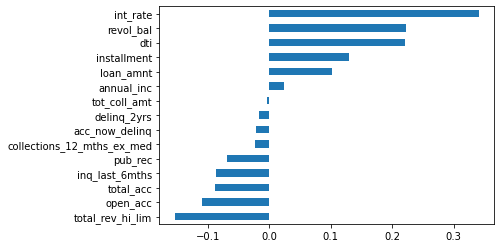

In [50]:
ld_index.corr()['revol_util'].drop('revol_util').sort_values().plot(kind='barh')

In [51]:
ld_index['revol_util'] = ld_index['revol_util'].fillna(ld_index.groupby('sub_grade')['revol_util'].transform('mean'))

In [52]:
ld_test_index['revol_util'] = ld_test_index['revol_util'].fillna(ld_test_index.groupby('sub_grade')['revol_util'].transform('mean'))

In [53]:
print(ld_index.revol_util.isna().sum(), ld_test_index.revol_util.isna().sum())

0 0


<AxesSubplot:>

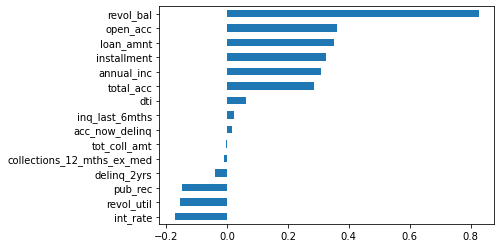

In [54]:
ld_index.corr()['total_rev_hi_lim'].drop('total_rev_hi_lim').sort_values().plot(kind='barh')

Since the total_rev_hi_lim column correlates so highly with revol_bal, and it has more missing values, I am going to drop the total_rev_hi_lim column.

In [55]:
ld_index.drop('total_rev_hi_lim', axis=1, inplace=True)
ld_test_index.drop('total_rev_hi_lim', axis=1, inplace=True)

In [56]:
print(ld_index.shape)
print(ld_test_index.shape)

(256910, 28)
(759338, 28)


## 2.12 Look at object columns<a id='2.12_Look_at_object_columns'></a> 	

In [57]:
ld_index.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [58]:
objectList = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d', 'application_type']
for i in objectList:
    print(i)
    print(ld_index[i].value_counts())
    print("\n")

grade
B    76607
C    66303
A    42430
D    41508
E    19922
F     7986
G     2154
Name: grade, dtype: int64


sub_grade
B3    18176
B4    17065
C1    15143
B2    14707
C2    14562
B5    14482
C3    12982
C4    12255
B1    12177
A5    12065
C5    11361
A4    11087
D1    10231
D2     9258
D3     8185
D4     7608
A3     7189
D5     6226
A2     6217
A1     5872
E1     4869
E2     4716
E3     3955
E4     3454
E5     2928
F1     2316
F2     1814
F3     1609
F4     1243
F5     1004
G1      730
G2      532
G3      366
G4      279
G5      247
Name: sub_grade, dtype: int64


emp_length
10+ years    77723
2 years      23995
< 1 year     21429
3 years      20748
5 years      18308
1 year       17296
4 years      16468
6 years      14959
7 years      14256
8 years      12029
9 years       9697
Name: emp_length, dtype: int64


home_ownership
MORTGAGE    126591
RENT        107814
OWN          22281
OTHER          179
NONE            44
ANY              1
Name: home_ownership, dtype: int64


verifica

Since there are only 511 joint accounts, and since the other joint columns have been deleted, I am going to drop 'application_type'.

'pymnt_plan' only has 10 'y' and 887369 'n' so I am going to drop this column.

In [59]:
# drop 'application_type', 'pymnt_plan'
ld_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)
ld_test_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)

In [60]:
# home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.
# Our values are: RENT, OWN, MORTGAGE, OTHER
# Which rows have the value of 'ANY' or 'NONE'?
ld_index[ld_index['home_ownership']=='ANY']

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
id,,,,,,,,,,,,,,,,,,,,,
26170263,5000.0,36,11.67,165.29,B,B4,5 years,ANY,35680.0,Source Verified,...,0.0,7.0,0.0,3319.0,43.1,12.0,Jan-2016,0.0,0.0,152.0


In [61]:
ld_index[ld_index['home_ownership']=='NONE'].head(10)

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt
id,,,,,,,,,,,,,,,,,,,,,
231321,10000.0,36,7.75,312.22,A,A3,5 years,NONE,22200.0,Not Verified,...,0.0,9.0,0.0,4767.0,8.7,22.0,Jan-2011,0.0,0.0,0.0
121568,4000.0,36,9.64,128.41,B,B4,< 1 year,NONE,100000.0,Not Verified,...,1.0,6.0,0.0,8155.0,14.9,8.0,Aug-2007,NaN,0.0,0.0
121535,2800.0,36,8.70,88.65,B,B1,< 1 year,NONE,120000.0,Not Verified,...,1.0,6.0,0.0,8155.0,14.9,8.0,Aug-2007,NaN,0.0,0.0
179929,15000.0,36,15.65,524.77,F,F3,6 years,NONE,72000.0,Not Verified,...,3.0,7.0,0.0,3193.0,59.1,26.0,Jan-2009,0.0,0.0,0.0
2144934,7250.0,36,8.90,230.22,A,A5,6 years,NONE,150000.0,Not Verified,...,0.0,12.0,0.0,26068.0,91.8,23.0,Jan-2016,0.0,0.0,0.0
2234704,16750.0,60,15.31,401.22,C,C2,8 years,NONE,38000.0,Verified,...,0.0,8.0,0.0,16404.0,32.4,19.0,Jun-2015,0.0,0.0,0.0
2234953,10750.0,36,11.14,352.66,B,B2,10+ years,NONE,32000.0,Verified,...,0.0,13.0,0.0,25606.0,64.5,28.0,Oct-2015,0.0,0.0,0.0
2264656,30000.0,36,19.05,1100.44,D,D4,10+ years,NONE,68000.0,Verified,...,1.0,6.0,0.0,10764.0,77.4,14.0,Jan-2016,0.0,0.0,0.0
2234929,15000.0,36,12.12,499.08,B,B3,10+ years,NONE,98000.0,Verified,...,0.0,17.0,0.0,47206.0,44.4,35.0,Jan-2016,0.0,0.0,0.0


From the description:
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.Our values are: RENT, OWN, MORTGAGE, OTHER

I am going to put the values 'ANY' and 'NONE' into 'OTHER'

In [62]:
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_index['home_ownership'].value_counts())

MORTGAGE    126591
RENT        107814
OWN          22281
OTHER          224
Name: home_ownership, dtype: int64


In [63]:
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_test_index['home_ownership'].value_counts())

MORTGAGE    371579
RENT        297100
OWN          90151
OTHER          508
Name: home_ownership, dtype: int64


In [64]:
# Removing "Does not meet the credit policy. Status:" from 'loan_status'
ld_index['loan_status'] = ld_index['loan_status'].str.replace('Does not meet the credit policy. Status:', '')

In [65]:
# check unique values of loan_status
ld_index['loan_status'].value_counts()

Fully Paid     209685
Charged Off     46006
Default          1219
Name: loan_status, dtype: int64

I am now going to create a new column, called 'defaults' which takes the information from 'loan_status' and puts it as a 0 if it's not a default and a 1 if it is a default

In [66]:
ld_index['defaults'] = 0

In [67]:
ld_index['defaults'].loc[ld_index['loan_status'] == 'Default'] = 1
ld_index['defaults'].loc[ld_index['loan_status'] == 'Charged Off'] = 1

C:\Users\McD\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [68]:
ld_index['defaults'].value_counts()

0    209685
1     47225
Name: defaults, dtype: int64

In [69]:
ld_test_index['defaults'] = 0
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Default'] = 1
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Charged Off'] = 1
ld_test_index['defaults'].value_counts()

0    722105
1     37233
Name: defaults, dtype: int64

From the description: 
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

This column should be integer values but I will need to strip the 'years', 'year', '+', and '<'

In [70]:
ld_index['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [71]:
ld_index['emp_length'] = ld_index['emp_length'].str.replace('< 1 year', '0')
ld_index['emp_length'] = ld_index['emp_length'].str.replace(' years', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace(' year', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace('+', '')
print(ld_index['emp_length'].value_counts())

10    77723
2     23995
0     21429
3     20748
5     18308
1     17296
4     16468
6     14959
7     14256
8     12029
9      9697
Name: emp_length, dtype: int64


In [72]:
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('< 1 year', '0')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace(' years', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace(' year', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('+', '')
print(ld_test_index['emp_length'].value_counts())

10    257944
2      69494
0      62724
3      60843
1      50585
5      46139
4      45573
6      32616
8      28707
9      28554
7      25796
Name: emp_length, dtype: int64


In [73]:
# now change the data type of emp_length to integers
ld_index['emp_length'] = pd.to_numeric(ld_index['emp_length'], downcast='integer')
ld_test_index['emp_length'] = pd.to_numeric(ld_test_index['emp_length'], downcast='integer')

In [74]:
ld_index['emp_length'].fillna(0, inplace=True)
ld_test_index['emp_length'].fillna(0, inplace=True)

In [75]:
# now I am going to drop the remaining missing values
ld_index.dropna(inplace=True)
print(ld_index.shape)
ld_test_index.dropna(inplace=True)
print(ld_test_index.shape)

(256773, 27)
(758964, 27)


In [76]:
ld_index['earliest_cr_line']

id
1077501     Jan-1985
1077430     Apr-1999
1077175     Nov-2001
1076863     Feb-1996
1075269     Nov-2004
              ...   
36743377    Aug-1990
36231718    Nov-1975
36241316    Feb-2011
36421485    Sep-2002
36260758    Jun-2002
Name: earliest_cr_line, Length: 256773, dtype: object

In [77]:
# I am going to just keep the year of the earliest_cr_line and last_credit_pull_d columns
ld_index['earliest_cr_line_year'] = ld_index['earliest_cr_line'].astype('object').str.slice(4, 8)
ld_index['last_credit_pull_d_year'] = ld_index['last_credit_pull_d'].astype('object').str.slice(4, 8)
ld_index.drop(['earliest_cr_line', 'last_credit_pull_d'], axis=1, inplace=True)
ld_test_index['earliest_cr_line_year'] = ld_test_index['earliest_cr_line'].astype('object').str.slice(4, 8)
ld_test_index['last_credit_pull_d_year'] = ld_test_index['last_credit_pull_d'].astype('object').str.slice(4, 8)
ld_test_index.drop(['earliest_cr_line', 'last_credit_pull_d'], axis=1, inplace=True)

In [78]:
ld_index['earliest_cr_line_year'] = ld_index['earliest_cr_line_year'].astype('int')
ld_index['last_credit_pull_d_year'] = ld_index['last_credit_pull_d_year'].astype('int')
ld_test_index['earliest_cr_line_year'] = ld_test_index['earliest_cr_line_year'].astype('int')
ld_test_index['last_credit_pull_d_year'] = ld_test_index['last_credit_pull_d_year'].astype('int')

In [81]:
df = ld_index
df_test = ld_test_index

## 2.13 Bar plots of the features<a id='2.13_Bar_plots_of_the_features'></a> 	

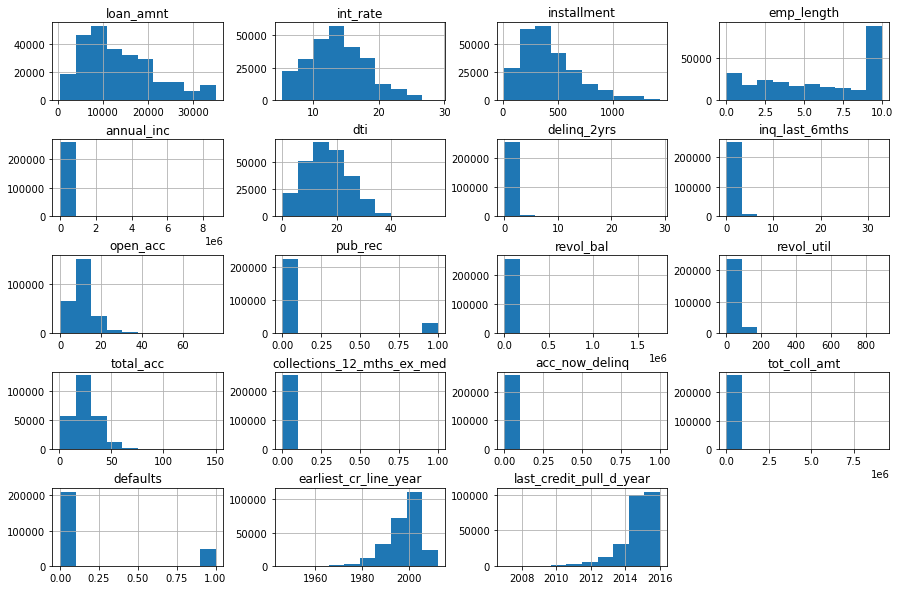

In [82]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

## 2.14 Outlier Removal<a id='2.14_Outlier_Removal'></a> 	

There appears to be outliers in annual_inc. The data is also skewed in columns such as tot_coll_amt.

In [83]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,256773.00,13526.43,8128.30,500.00,7200.00,12000.00,18200.00,35000.00
int_rate,256773.00,13.78,4.39,5.32,10.74,13.57,16.55,28.99
installment,256773.00,417.05,244.86,15.67,238.16,364.48,546.44,1424.57
emp_length,256773.00,5.59,3.73,0.00,2.00,6.00,10.00,10.00
annual_inc,256773.00,72497.77,58894.72,1896.00,45000.00,62000.00,87000.00,8706582.00
dti,256773.00,16.54,7.79,0.00,10.75,16.21,21.99,57.14
delinq_2yrs,256773.00,0.25,0.74,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,256773.00,0.89,1.16,0.00,0.00,1.00,1.00,33.00
open_acc,256773.00,10.94,4.90,0.00,7.00,10.00,14.00,76.00
pub_rec,256773.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00


In [84]:
df_test.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,758964.00,14706.54,9214.83,1000.00,7500.00,12000.00,20000.00,40000.00
int_rate,758964.00,13.19,5.05,5.32,9.75,12.62,15.59,30.99
installment,758964.00,442.55,275.73,30.12,241.70,370.84,590.44,1719.83
emp_length,758964.00,5.57,3.91,0.00,2.00,5.00,10.00,10.00
annual_inc,758964.00,80005.74,163445.16,15.00,48000.00,67000.00,95000.00,110000000.00
dti,758964.00,18.98,13.36,-1.00,12.26,18.18,24.78,999.00
delinq_2yrs,758964.00,0.36,0.95,0.00,0.00,0.00,0.00,42.00
inq_last_6mths,758964.00,0.54,0.84,0.00,0.00,0.00,1.00,5.00
open_acc,758964.00,11.82,5.77,0.00,8.00,11.00,15.00,97.00
pub_rec,758964.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00


Looking at the distributions of many of these columns, there are many columns with a lot of zero values and then large maximum values.

### annual_inc
The max annual income is 8,706,582 which seems to be an outlier(maybe a missing decimal). What is 3 times the standard deviation of the mean of annual income? How many samples are over that amount?

In [85]:
print('annual_inc above {} is an outlier'.format(df.annual_inc.mean() + 3*df.annual_inc.std()))

annual_inc above 249181.92747657403 is an outlier


So how many samples have recorded annual incomes over $250,000?

In [86]:
len(df[df['annual_inc'] > 250000])

1884

In [87]:
len(df_test[df_test['annual_inc'] > 250000])

9631

I am going to change the 1884 samples in the training set to the mean. I am going to deleted the outliers from the holdout set.

In [88]:
df.annual_inc.mean()

72497.77458175096

In [89]:
df['annual_inc'].where(df['annual_inc'] <= 250000, 75293, inplace=True)

In [90]:
df.annual_inc.describe()

count    256773.000000
mean      70023.285528
std       36319.503195
min        1896.000000
25%       45000.000000
50%       62000.000000
75%       85000.000000
max      250000.000000
Name: annual_inc, dtype: float64

In [91]:
df_test = df_test[df_test['annual_inc'] <= 250000]

### dti

An amount over 100 is an outlier. I am going to delete those rows from the holdout set.

In [92]:
df_test = df_test[df_test.dti <= 100]

### revol_bal

In [93]:
df.groupby('defaults')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209579.0,15327.878275,19769.922551,0.0,5762.00,10836.0,19060.0,1743266.0
1,47194.0,15190.244735,19389.125691,0.0,6174.25,11307.0,19222.5,1746716.0


In [94]:
df['log_revol_bal'] = df['revol_bal'].apply(lambda x: np.log10(x+1))
df.groupby('defaults')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209579.0,3.963142,0.570446,0.0,3.760649,4.034909,4.280146,6.241364
1,47194.0,3.982420,0.544914,0.0,3.790655,4.053386,4.283832,6.242223


In [95]:
df.drop('revol_bal', axis=1, inplace=True)

In [96]:
df_test['log_revol_bal'] = df_test['revol_bal'].apply(lambda x: np.log10(x+1))
df_test.drop('revol_bal', axis=1, inplace=True)

### revol_util

In [97]:
df.groupby('defaults')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209579.0,53.188074,24.946445,0.0,34.8,54.5,72.8,892.3
1,47194.0,59.371938,23.573091,0.0,43.1,61.5,78.0,129.4


In [98]:
df[df.revol_util >150]

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,defaults,earliest_cr_line_year,last_credit_pull_d_year,log_revol_bal
id,,,,,,,,,,,,,,,,,,,,,
14539315,10000.0,36,14.16,342.56,C,C2,10.0,OWN,91000.0,Not Verified,...,0.0,150.7,37.0,0.0,0.0,0.0,0,1997,2015,3.970579
14539247,3500.0,36,12.49,117.08,B,B4,10.0,RENT,45000.0,Verified,...,0.0,892.3,9.0,0.0,0.0,0.0,0,1998,2016,3.427811
13027755,35000.0,36,25.83,1407.01,G,G2,10.0,RENT,165800.0,Verified,...,0.0,153.0,5.0,0.0,0.0,0.0,0,2005,2015,4.218063


In [99]:
df = df[df.revol_util <= 150]
df.groupby('defaults')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209576.0,53.183129,24.877327,0.0,34.8,54.5,72.8,146.1
1,47194.0,59.371938,23.573091,0.0,43.1,61.5,78.0,129.4


### total_acc

In [100]:
df.groupby('defaults')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209576.0,25.198959,11.813615,1.0,17.0,24.0,32.0,150.0
1,47194.0,24.199814,11.580998,1.0,16.0,23.0,31.0,110.0


In [101]:
df[df.total_acc > 62]

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,defaults,earliest_cr_line_year,last_credit_pull_d_year,log_revol_bal
id,,,,,,,,,,,,,,,,,,,,,
1065110,35000.0,60,17.27,578.71,D,D3,8.0,MORTGAGE,208000.0,Source Verified,...,0.0,23.5,79.0,0.0,0.0,0.0,0,1993,2016,3.575419
1049079,31300.0,60,20.30,834.50,E,E5,10.0,MORTGAGE,75000.0,Verified,...,0.0,43.9,63.0,0.0,0.0,0.0,0,1981,2012,4.414556
1037951,20000.0,36,13.49,678.61,C,C1,1.0,MORTGAGE,118560.0,Verified,...,0.0,31.4,63.0,0.0,0.0,0.0,0,1992,2015,4.391041
1016497,20000.0,60,17.58,503.32,D,D4,10.0,MORTGAGE,66000.0,Verified,...,0.0,73.4,63.0,0.0,0.0,0.0,1,2000,2013,4.024321
1015832,14000.0,36,6.62,429.86,A,A2,10.0,RENT,55000.0,Verified,...,0.0,27.8,63.0,0.0,0.0,0.0,0,1998,2016,4.201151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38352103,15000.0,36,7.49,466.53,A,A4,4.0,OWN,100000.0,Source Verified,...,0.0,25.5,69.0,0.0,0.0,294.0,0,1998,2016,3.960471
38251439,35000.0,36,11.99,1162.34,B,B5,2.0,MORTGAGE,135000.0,Verified,...,0.0,41.0,71.0,0.0,0.0,0.0,0,2000,2016,4.587733
37907180,30000.0,36,10.49,974.94,B,B3,2.0,MORTGAGE,250000.0,Source Verified,...,1.0,51.7,65.0,0.0,0.0,0.0,0,2002,2015,4.325454


### tot_coll_amt

In [102]:
df.groupby('defaults')['tot_coll_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
defaults,,,,,,,,
0,209576.0,161.563285,20046.292151,0.0,0.0,0.0,0.0,9152545.0
1,47194.0,103.332987,1144.082979,0.0,0.0,0.0,0.0,95806.0


In [103]:
df = df[df.tot_coll_amt < 25000]

In [104]:
df_test = df_test[df_test.tot_coll_amt < 25000]

In [105]:
df.shape

(256640, 27)

In [106]:
df_test.shape

(748081, 27)

## 2.15 Save the data<a id='2.15_Save_the_data'></a>

In [107]:
# save the data to a new csv file
df.to_csv('../data/cleaned_data/LC_cleaned.csv')
df_test.to_csv('../data/cleaned_data/LC_2016_2017_cleaned.csv')

## 2.16 Summary<a id='2.16_Summary'></a>
The training and test sets have the same columns and index now.

The columns that I changed in the training set have also been changed in the test set.

I still have not decided how to handle some of the object fields like 'purpose', 'grade', etc. I don't know if these columns can be useful so I've decided to keep them for now. 

I have filled missing values and have done some initial outlier removal. 
